In [19]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

In [20]:
def pad_image(image, kernel_size):
    height, width = image.shape
    pad_height = kernel_size[0] // 2
    pad_width = kernel_size[1] // 2
    padded_image = np.zeros((height + 2*pad_height, width + 2*pad_width))
    padded_image[pad_height:height+pad_height, pad_width:width+pad_width] = image
    start_row = pad_height
    end_row = start_row + height
    start_col = pad_width
    end_col = start_col + width
    return padded_image, start_row, end_row, start_col, end_col

def unpad_image(padded_image, start_row, end_row, start_col, end_col):
    unpadded_image = padded_image[start_row:end_row, start_col:end_col]
    return unpadded_image

# Reading an image

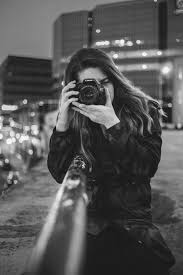

In [21]:
image = cv2.imread('/content/Photo_5.jpeg',0)
cv2_imshow(image)

# Median Filter

In [22]:
def Median(Kernel_size):
  kernel=[]
  k=[Kernel_size,Kernel_size]
  r2=0
  c2=0
  img,start_row, end_row, start_col, end_col= pad_image(image,k)
  Image_After=np.empty((img.shape[0],img.shape[1]))

  while r2 <= img.shape[0]-k[0]:
    kernel.clear()
    for r in range(r2,r2+k[0]):
      for c in range(c2,c2+k[1]):
        kernel.append(img[r,c])
        if np.isnan(Image_After[r,c]):
          Image_After[r,c] = img[r,c]

    kernel.sort()
    Image_After[r2+math.floor(k[0]/2),c2+math.floor(k[1]/2)] = kernel[math.floor(len(kernel)/2)]

    if c2 == img.shape[1]-k[1]:
      c2=0
      r2+=1
    else:
      c2+=1


  Image_After=unpad_image(Image_After, start_row, end_row, start_col, end_col)
  print("Before Filter Image:")
  cv2_imshow(image)
  print(" ")
  print("Padded Image:")
  cv2_imshow(img)
  print(" ")
  print("After Filter Image:")
  cv2_imshow(Image_After)

# Averaging Filter

In [23]:
def Average(Kernel_size):
  kernel=0
  k=[Kernel_size,Kernel_size]
  r2=0
  c2=0
  img,start_row, end_row, start_col, end_col= pad_image(image,k)
  Image_After=np.zeros((img.shape[0],img.shape[1]))

  while r2 <= img.shape[0]-k[0]:
     kernel=0
     for r in range(r2,r2+k[0]):
      for c in range(c2,c2+k[1]):
        kernel+=img[r,c]
  
     Image_After[r2+math.floor(k[0]/2),c2+math.floor(k[1]/2)] = kernel/(k[0]**2) 

     if c2 == img.shape[1]-k[1]:
      c2=0
      r2=r2+1
     else:
      c2=c2+1

  Image_After=unpad_image(Image_After, start_row, end_row, start_col, end_col)
  print("Before Filter Image:")
  cv2_imshow(image)
  print(" ")
  print("Padded Image:")
  cv2_imshow(img)
  print(" ")
  print("After Filter Image:")
  cv2_imshow(Image_After)

# Maximum Filter

In [24]:
def Max(Kernel_size):
  kernel=[]
  k=[Kernel_size,Kernel_size]
  r2=0
  c2=0
  img,start_row, end_row, start_col, end_col= pad_image(image,k)
  Image_After=np.empty((img.shape[0],img.shape[1]))

  while r2 <= img.shape[0]-k[0]:
    kernel.clear()
    for r in range(r2,r2+k[0]):
      for c in range(c2,c2+k[1]):
        kernel.append(img[r,c])
        if np.isnan(Image_After[r,c]):
          Image_After[r,c] = img[r,c]

    kernel.sort()
    Image_After[r2+math.floor(k[0]/2),c2+math.floor(k[1]/2)] = kernel[len(kernel)-1]

    if c2 == img.shape[1]-k[1]:
      c2=0
      r2+=1
    else:
      c2+=1


  Image_After=unpad_image(Image_After, start_row, end_row, start_col, end_col)
  print("Before Filter Image:")
  cv2_imshow(image)
  print(" ")
  print("Padded Image:")
  cv2_imshow(img)
  print(" ")
  print("After Filter Image:")
  cv2_imshow(Image_After)

# Minimum Filter

In [25]:
def Min(Kernel_size):
  kernel=[]
  k=[Kernel_size,Kernel_size]
  r2=0
  c2=0
  img,start_row, end_row, start_col, end_col= pad_image(image,k)
  Image_After=np.empty((img.shape[0],img.shape[1]))

  while r2 <= img.shape[0]-k[0]:
    kernel.clear()
    for r in range(r2,r2+k[0]):
      for c in range(c2,c2+k[1]):
        kernel.append(img[r,c])
        if np.isnan(Image_After[r,c]):
          Image_After[r,c] = img[r,c]

    kernel.sort()
    Image_After[r2+math.floor(k[0]/2),c2+math.floor(k[1]/2)] = kernel[0]

    if c2 == img.shape[1]-k[1]:
      c2=0
      r2+=1
    else:
      c2+=1


  Image_After=unpad_image(Image_After, start_row, end_row, start_col, end_col)
  print("Before Filter Image:")
  cv2_imshow(image)
  print(" ")
  print("Padded Image:")
  cv2_imshow(img)
  print(" ")
  print("After Filter Image:")
  cv2_imshow(Image_After)

# Adaptive Filter

In [28]:
def Adaptive(Filter_Number,Kernel_size):
  if Filter_Number == 1:
    Median(Kernel_size)

  if Filter_Number == 2:
    Max(Kernel_size)
  
  if Filter_Number == 3:
    Min(Kernel_size)

Before Filter Image:


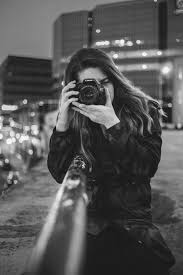

 
Padded Image:


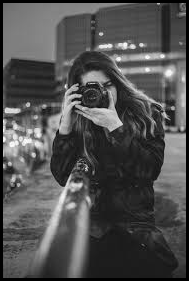

 
After Filter Image:


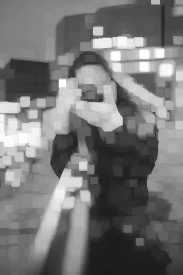

In [29]:
Adaptive(2,7)